In [1]:
!nvidia-smi

Sat May 20 08:36:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

import helper function list

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-20 08:36:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-20 08:36:40 (78.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
import tensorflow as tf
from  helper_functions  import walk_through_dir,create_tensorboard_callback,plot_loss_curves,unzip_data

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-05-20 08:36:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  38.7MB/s    in 4.8s    

2023-05-20 08:36:49 (33.4 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [6]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [7]:
train_dir="/content/10_food_classes_10_percent/train/"
test_dir="/content/10_food_classes_10_percent/test/"

In [8]:
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode="categorical",
                                                               batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode="categorical",
                                                               batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [10]:
class_name=train_data.class_names
class_name

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
for names,labels in train_data.take(1):
  print(names,labels)

tf.Tensor(
[[[[137.22958    58.22959    28.229591 ]
   [140.16837    61.168365   30.571428 ]
   [141.21939    60.433674   29.790815 ]
   ...
   [113.637825   55.066357   38.852093 ]
   [113.64286    54.642857   38.642857 ]
   [117.714355   55.714355   40.714355 ]]

  [[140.04591    61.04592    31.045918 ]
   [143.64796    62.64796    32.64796  ]
   [147.0153     66.37245    33.586735 ]
   ...
   [110.54078    53.540775   36.540775 ]
   [116.07146    57.071457   41.071457 ]
   [118.59691    56.596905   41.596905 ]]

  [[138.28061    57.709183   28.494898 ]
   [142.35715    61.357143   31.357143 ]
   [145.80612    62.760204   30.331633 ]
   ...
   [110.16835    53.382614   36.382614 ]
   [114.98473    55.98473    39.98473  ]
   [118.21425    56.85711    41.642822 ]]

  ...

  [[131.24487   155.24487    79.24487  ]
   [129.41342   156.16855    79.81134  ]
   [127.02545   155.02545    80.239716 ]
   ...
   [162.61247   222.49493   143.30638  ]
   [170.04587   218.03055   152.48976  ]
   [2

##Building a transfer learning model by using Functional API

In [12]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

16705208/16705208 [==============================] - 1s 0us/step


In [13]:
base_model.trainable=False

In [14]:
inputs=tf.keras.Input(shape=(224,224,3),name="Input Layer")
x=base_model(inputs)
print(f"Shape after passing through base_model {x.shape}")
x=tf.keras.layers.GlobalAvgPool2D(name="global_average_pooling_layer")(x)
print(f"Shape after passing through global_average_pooling_layer {x.shape}")
outputs=tf.keras.layers.Dense(10,activation="softmax",name="Output_Layers")(x)

Shape after passing through base_model (None, 7, 7, 1280)
Shape after passing through global_average_pooling_layer (None, 1280)


In [15]:
model_0=tf.keras.Model(inputs,outputs)

In [16]:
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data)), 
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230520-083700


Epoch 1/5
24/24 [==============================] - 28s 241ms/step - loss: 1.9780 - accuracy: 0.3467 - val_loss: 1.3710 - val_accuracy: 0.7056
Epoch 2/5
24/24 [==============================] - 5s 176ms/step - loss: 1.1285 - accuracy: 0.7747 - val_loss: 0.9150 - val_accuracy: 0.8092
Epoch 3/5
24/24 [==============================] - 5s 174ms/step - loss: 0.7931 - accuracy: 0.8427 - val_loss: 0.7235 - val_accuracy: 0.8372
Epoch 4/5
24/24 [==============================] - 4s 133ms/step - loss: 0.6411 - accuracy: 0.8613 - val_loss: 0.6196 - val_accuracy: 0.8569
Epoch 5/5
24/24 [==============================] - 5s 176ms/step - loss: 0.5399 - accuracy: 0.8840 - val_loss: 0.5566 - val_accuracy: 0.8684


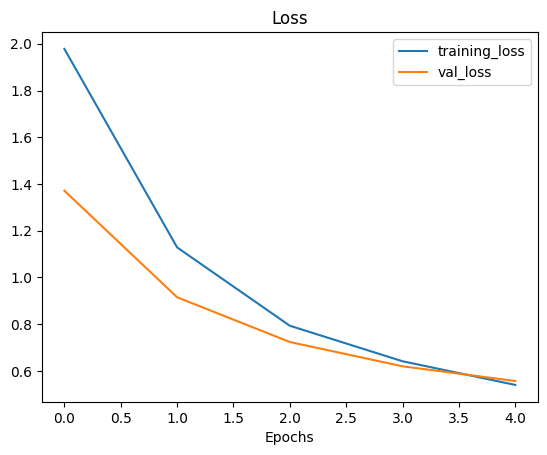

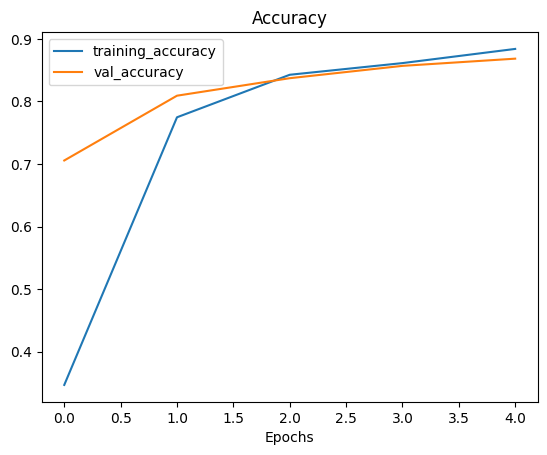

In [17]:
plot_loss_curves(history_10_percent)

In [18]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 72ms/step - loss: 0.5605 - accuracy: 0.8636


[0.5604860782623291, 0.8636000156402588]

In [19]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 Output_Layers (Dense)       (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


#**MODEL 1**

#MODEL 1:- USE FEATURE EXTRACTION LEARNING WITH 1 % DATA WITH DATA AUGMENTATION

In [20]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip"

--2023-05-20 08:38:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  36.2MB/s    in 3.5s    

2023-05-20 08:38:09 (36.2 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [21]:
unzip_data("10_food_classes_1_percent.zip")

In [22]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import random

In [24]:
train_dir="/content/10_food_classes_1_percent/train/"
test_dir="/content/10_food_classes_1_percent/test/"

In [25]:
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode="categorical",
                                                               batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode="categorical",
                                                               batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [26]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

##lets visualise the data we have 

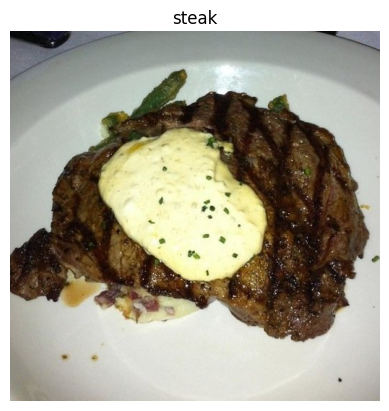

In [27]:
target_class=random.choice(train_data.class_names)
target_dir="/content/10_food_classes_1_percent/train"+"/"+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+random_image

img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(target_class)
plt.axis(False);

###DATA AUGMENTATION

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")
     

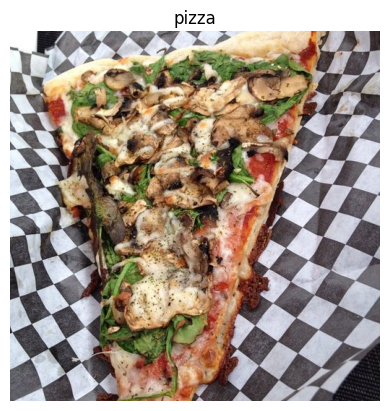

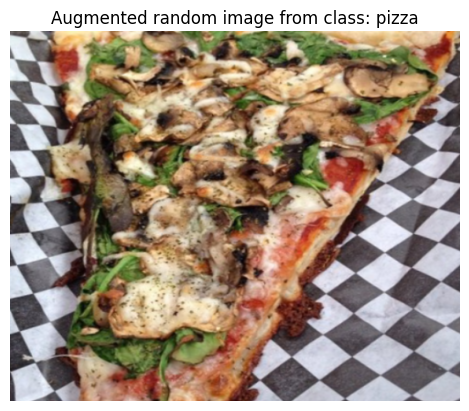

In [29]:
target_class=random.choice(train_data.class_names)
target_dir="/content/10_food_classes_1_percent/train"+"/"+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+random_image

img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(target_class)
plt.axis(False);

augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [30]:
input_shape = (224, 224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs=layers.Input(shape=input_shape,name="Input_layer")

x=data_augmentation(inputs)

x=base_model(x, training=False)

x=layers.GlobalAvgPool2D(name="Global_Avg_Pool_Layer")(x)

outputs=layers.Dense(10,activation="softmax",name="Output_Layer")(x)

model_1=tf.keras.Model(inputs,outputs)





In [31]:
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_1_percent = model_1.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data)), 
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_feature_extract")])

Saving TensorBoard log files to: transfer_learning/1_percent_feature_extract/20230520-083815
Epoch 1/5
3/3 [==============================] - 12s 2s/step - loss: 2.3974 - accuracy: 0.1143 - val_loss: 2.3328 - val_accuracy: 0.1102
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1423 - accuracy: 0.1286 - val_loss: 2.1746 - val_accuracy: 0.2138
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9032 - accuracy: 0.4000 - val_loss: 2.0779 - val_accuracy: 0.2845
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7920 - accuracy: 0.5000 - val_loss: 1.9597 - val_accuracy: 0.3717
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6003 - accuracy: 0.6857 - val_loss: 1.8770 - val_accuracy: 0.3964


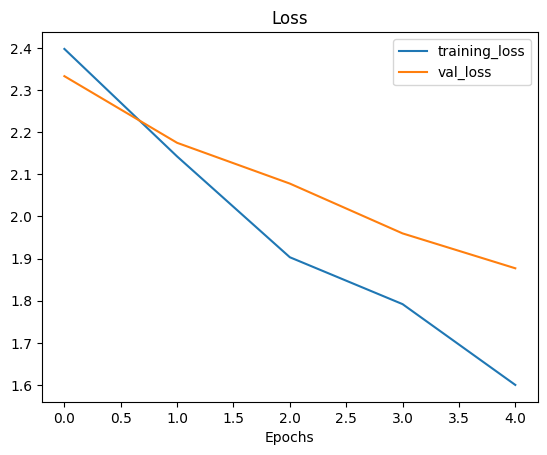

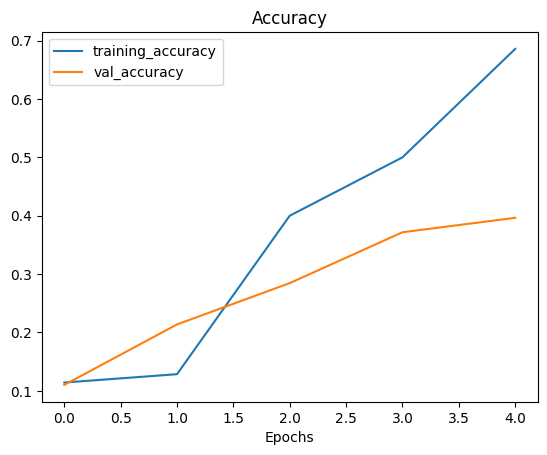

In [32]:
plot_loss_curves(history_1_percent)

##**MODEL_2**

In [33]:
train_dir="/content/10_food_classes_10_percent/train/"
test_dir="/content/10_food_classes_10_percent/test/"

In [34]:
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode="categorical",
                                                               batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode="categorical",
                                                               batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [35]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [36]:
class_name=train_data.class_names
class_name

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [37]:
for names,labels in train_data.take(1):
  print(names,labels)

tf.Tensor(
[[[[4.34846954e+01 2.38979588e+01 1.68979588e+01]
   [3.96632652e+01 2.25204086e+01 1.45918369e+01]
   [3.88724480e+01 2.50867348e+01 1.60867348e+01]
   ...
   [5.97092133e+01 4.28571205e+01 2.29183388e+01]
   [6.00254631e+01 3.90254631e+01 1.80254631e+01]
   [5.79440041e+01 3.79440041e+01 1.39440050e+01]]

  [[4.85255089e+01 3.11224499e+01 2.11224499e+01]
   [3.77653046e+01 2.33469372e+01 1.24846916e+01]
   [4.49438782e+01 3.32295914e+01 2.12857151e+01]
   ...
   [5.67296333e+01 4.01581612e+01 2.18316498e+01]
   [6.05713501e+01 4.25713501e+01 2.22958164e+01]
   [5.68573151e+01 3.58573151e+01 1.48573170e+01]]

  [[5.83418350e+01 4.45000000e+01 2.92040825e+01]
   [5.19795914e+01 4.00510216e+01 2.38214283e+01]
   [4.75969391e+01 4.05969391e+01 2.27653065e+01]
   ...
   [5.04541931e+01 3.58827209e+01 1.73112507e+01]
   [5.86071892e+01 4.16071892e+01 2.16071892e+01]
   [6.01886330e+01 4.24029198e+01 2.24029198e+01]]

  ...

  [[2.47882935e+02 2.50311462e+02 2.49739990e+02]
   [2

##Building a transfer learning model by using Functional API

In [38]:
data_augmentation=tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)

],name="data_augmentation")

In [39]:
input_shape = (224, 224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=keras.layers.Input(shape=input_shape ,name="input_shape")

x=data_augmentation(inputs)

x=base_model(x,training=False)

x=layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)

outputs=layers.Dense(10,activation="softmax",name="output_layer")(x)

model_2=keras.Model(inputs,outputs)



In [40]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.h5" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [41]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent1 = model_2.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data)), 
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract"),checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230520-083856
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9556 - accuracy: 0.3747
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.h5
24/24 [==============================] - 22s 621ms/step - loss: 1.9556 - accuracy: 0.3747 - val_loss: 1.4090 - val_accuracy: 0.6431
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2909 - accuracy: 0.6893
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.h5
24/24 [==============================] - 12s 469ms/step - loss: 1.2909 - accuracy: 0.6893 - val_loss: 0.9634 - val_accuracy: 0.7780
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0061 - accuracy: 0.7640
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.h5
24/24 [==============================] - 15s 627ms/step - loss: 1.0061 - accuracy: 0.7640 - val_loss: 0.7835 - val_accuracy: 0.8010


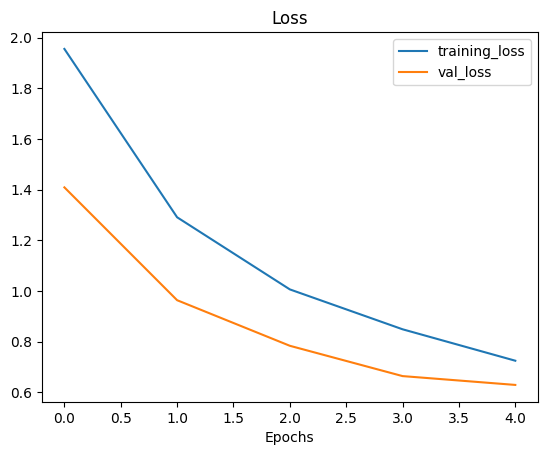

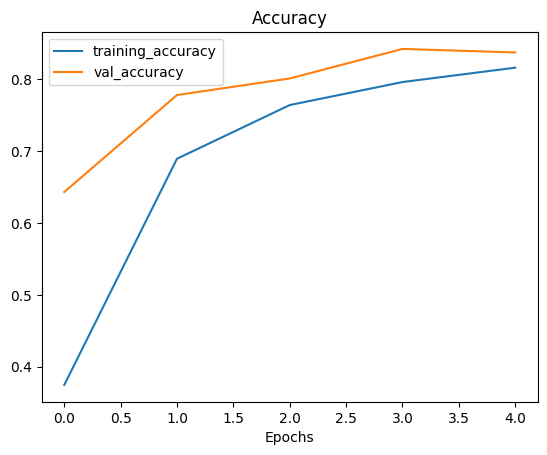

In [42]:
plot_loss_curves(history_10_percent1)

In [43]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [44]:
results=model_2.evaluate(test_data)
results

79/79 [==============================] - 6s 66ms/step - loss: 0.6266 - accuracy: 0.8448


[0.6265835165977478, 0.8447999954223633]

In [45]:
model_1.evaluate(test_data)

79/79 [==============================] - 5s 63ms/step - loss: 1.8895 - accuracy: 0.3956


[1.8894670009613037, 0.39559999108314514]

In [46]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 77ms/step - loss: 0.5605 - accuracy: 0.8636


[0.5604861378669739, 0.8636000156402588]

**loading checkpoints**

In [47]:
model_2.load_weights(checkpoint_path)

In [48]:
loaded_weights_model_result=model_2.evaluate(test_data)

79/79 [==============================] - 6s 77ms/step - loss: 0.6266 - accuracy: 0.8448


In [49]:
loaded_weights_model_result==results

True

###FINE TUNING THE BASE MODEL 

In [50]:
model_2.layers

In [51]:
for layer in model_2.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f4305797820> True
<keras.engine.sequential.Sequential object at 0x7f43057966b0> True
<keras.engine.functional.Functional object at 0x7f43053c58a0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f4305013370> True
<keras.layers.core.dense.Dense object at 0x7f43053c5660> True


In [52]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [53]:
print(len(model_2.layers[2].trainable_variables))

0


In [54]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False

model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [55]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [56]:
initial_epochs = 5
fine_tune_epochs=initial_epochs+5

history_fine_10_percent_data=model_2.fit(train_data,
                              epochs=fine_tune_epochs,
                              validation_data=test_data,
                              validation_steps=int(0.25*(len(test_data))),
                              initial_epoch=history_10_percent1.epoch[-1],
                              callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_finetune")]
                                                         )

Saving TensorBoard log files to: transfer_learning/10_percent_finetune/20230520-084103
Epoch 5/10
24/24 [==============================] - 23s 497ms/step - loss: 0.6017 - accuracy: 0.8400 - val_loss: 0.5034 - val_accuracy: 0.8388
Epoch 6/10
24/24 [==============================] - 10s 402ms/step - loss: 0.5251 - accuracy: 0.8373 - val_loss: 0.4984 - val_accuracy: 0.8257
Epoch 7/10
24/24 [==============================] - 10s 391ms/step - loss: 0.4192 - accuracy: 0.8707 - val_loss: 0.4542 - val_accuracy: 0.8322
Epoch 8/10
24/24 [==============================] - 8s 337ms/step - loss: 0.4344 - accuracy: 0.8587 - val_loss: 0.4236 - val_accuracy: 0.8569
Epoch 9/10
24/24 [==============================] - 11s 426ms/step - loss: 0.3328 - accuracy: 0.9080 - val_loss: 0.4261 - val_accuracy: 0.8602
Epoch 10/10
24/24 [==============================] - 9s 385ms/step - loss: 0.3370 - accuracy: 0.8973 - val_loss: 0.4432 - val_accuracy: 0.8421


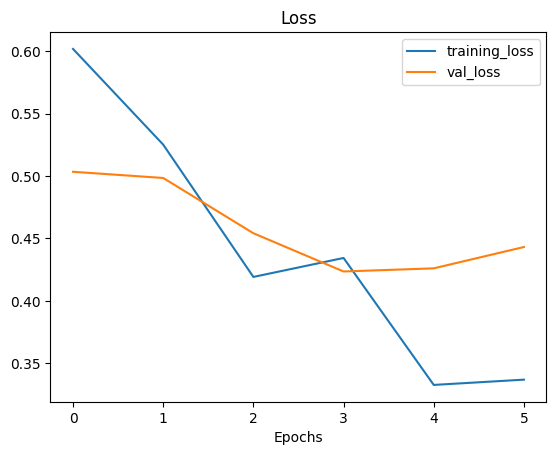

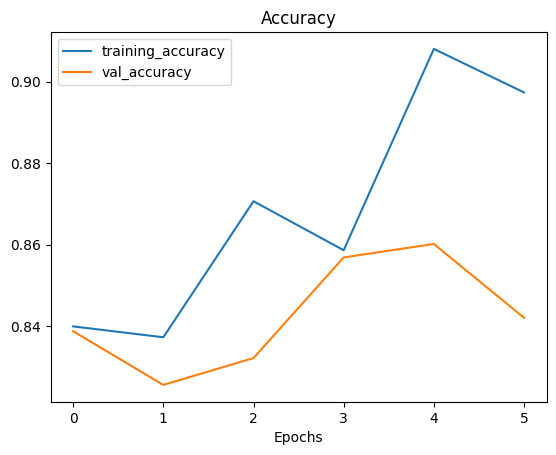

In [57]:
plot_loss_curves(history_fine_10_percent_data)

In [58]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()
     

5
11
[0.37466666102409363, 0.6893333196640015, 0.7639999985694885, 0.7960000038146973, 0.8159999847412109, 0.8399999737739563, 0.8373333215713501, 0.8706666827201843, 0.8586666584014893, 0.9079999923706055, 0.8973333239555359]


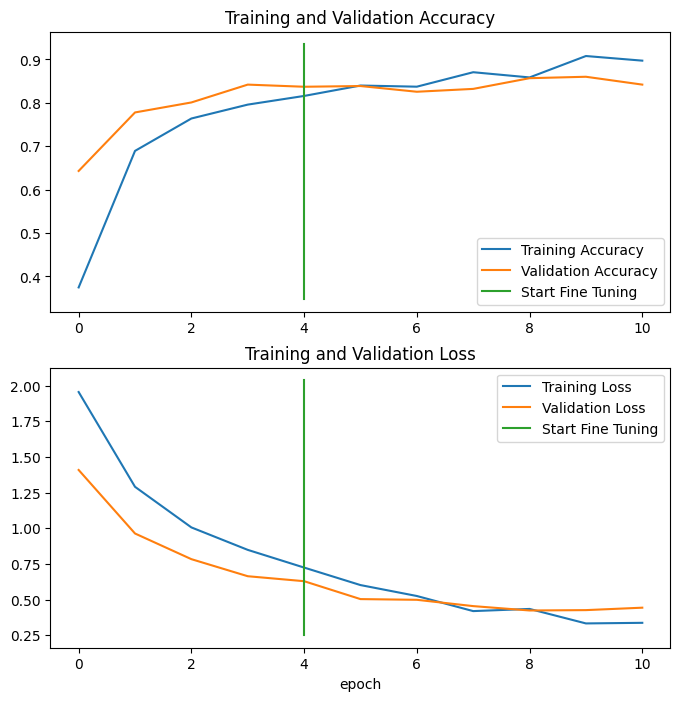

In [59]:
compare_historys(history_10_percent1, history_fine_10_percent_data, initial_epochs=5)

##MODEL_4

In [60]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-05-20 08:42:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 74.125.143.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  39.1MB/s    in 14s     

2023-05-20 08:42:29 (36.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [61]:
unzip_data("10_food_classes_all_data.zip")

In [62]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

In [63]:
train_dir="/content/10_food_classes_all_data/train/"
test_dir="/content/10_food_classes_all_data/test/"

In [64]:
IMG_SIZE=(224,224)

train_data_full=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               image_size=IMG_SIZE,
                                                               batch_size=32,
                                                               label_mode='categorical')

test_data_full=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size=IMG_SIZE,
                                                               batch_size=32,
                                                               label_mode='categorical')

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [65]:
model_2.evaluate(test_data_full)

79/79 [==============================] - 6s 75ms/step - loss: 0.4327 - accuracy: 0.8576


[0.4326877295970917, 0.8575999736785889]

In [66]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-train

In [67]:
model_2.layers[2].trainable=False

In [68]:
model_2.load_weights(checkpoint_path)

In [69]:
model_2.layers

In [70]:
for layer in model_2.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f4305797820> True
<keras.engine.sequential.Sequential object at 0x7f43057966b0> True
<keras.engine.functional.Functional object at 0x7f43053c58a0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f4305013370> True
<keras.layers.core.dense.Dense object at 0x7f43053c5660> True


In [71]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 66ms/step - loss: 0.6266 - accuracy: 0.8448


[0.6265835165977478, 0.8447999954223633]

In [72]:
loaded_weights_model_result

[0.6265835165977478, 0.8447999954223633]

In [73]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False

model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [74]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [75]:
initial_epochs = 5
fine_tune_epochs=initial_epochs+5

history_fine_all_data=model_2.fit(train_data_full,
                              epochs=fine_tune_epochs,
                              validation_data=test_data,
                              validation_steps=int(0.25*(len(test_data))),
                              initial_epoch=history_10_percent1.epoch[-1],
                              callbacks=[create_tensorboard_callback("transfer_learning", "al_datat_finetune")]
                                                         )

Saving TensorBoard log files to: transfer_learning/al_datat_finetune/20230520-084252


Epoch 5/10
235/235 [==============================] - 73s 270ms/step - loss: 0.6529 - accuracy: 0.7883 - val_loss: 0.3651 - val_accuracy: 0.8766
Epoch 6/10
235/235 [==============================] - 56s 236ms/step - loss: 0.5309 - accuracy: 0.8273 - val_loss: 0.3100 - val_accuracy: 0.8931
Epoch 7/10
235/235 [==============================] - 51s 215ms/step - loss: 0.4549 - accuracy: 0.8553 - val_loss: 0.3143 - val_accuracy: 0.8882
Epoch 8/10
235/235 [==============================] - 48s 202ms/step - loss: 0.4202 - accuracy: 0.8612 - val_loss: 0.2593 - val_accuracy: 0.8997
Epoch 9/10
235/235 [==============================] - 46s 194ms/step - loss: 0.3766 - accuracy: 0.8773 - val_loss: 0.2581 - val_accuracy: 0.9013
Epoch 10/10
235/235 [==============================] - 43s 180ms/step - loss: 0.3519 - accuracy: 0.8884 - val_loss: 0.2558 - val_accuracy: 0.9095


5
11
[0.37466666102409363, 0.6893333196640015, 0.7639999985694885, 0.7960000038146973, 0.8159999847412109, 0.788266658782959, 0.8273333311080933, 0.8553333282470703, 0.8611999750137329, 0.8773333430290222, 0.8884000182151794]


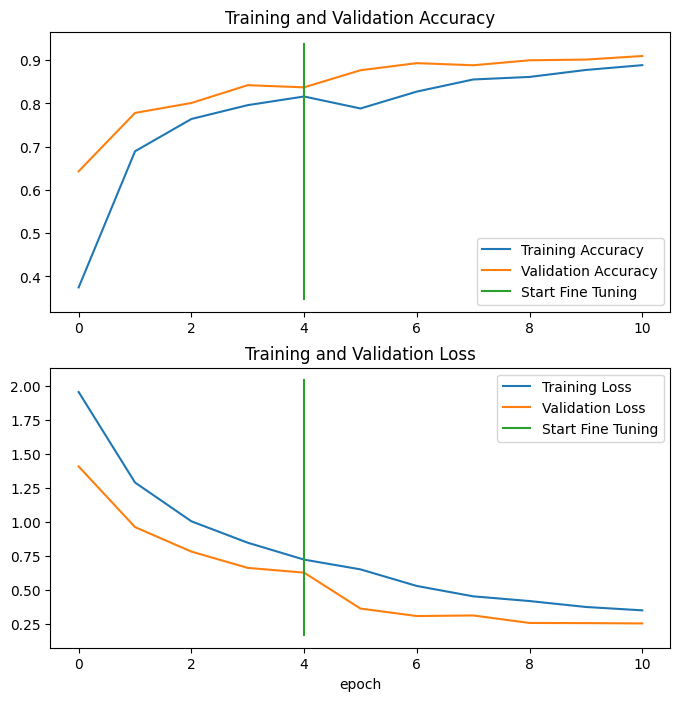

In [76]:
compare_historys( history_10_percent1 ,history_fine_all_data, initial_epochs=5)

In [77]:
model_2.evaluate(test_data_full)

79/79 [==============================] - 6s 68ms/step - loss: 0.2874 - accuracy: 0.9028


[0.2873762845993042, 0.9028000235557556]